# Exploração dos dados de irradiação solar

## Imports

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

## Paths

In [3]:
SOLAR_DATA_PATH = '../data/raw/solar_irradiation/global_horizontal_means.shp'
STATES_DATA_PATH = '../data/raw/state_lines/BR_UF_2024.shp'

## Carregamento de Dados

In [5]:
solar_gdf = gpd.read_file(SOLAR_DATA_PATH)
states_gdf = gpd.read_file(STATES_DATA_PATH)

## Descrição dos dados

In [6]:
print("Estatísticas da Irradiação Solar Anual (kWh/m²):")
print(solar_gdf['ANNUAL'].describe())

Estatísticas da Irradiação Solar Anual (kWh/m²):
count    72272.000000
mean      4911.835413
std        427.880628
min       3594.000000
25%       4565.000000
50%       4838.000000
75%       5194.000000
max       6120.000000
Name: ANNUAL, dtype: float64


## Mapa de irradiação do Brasil

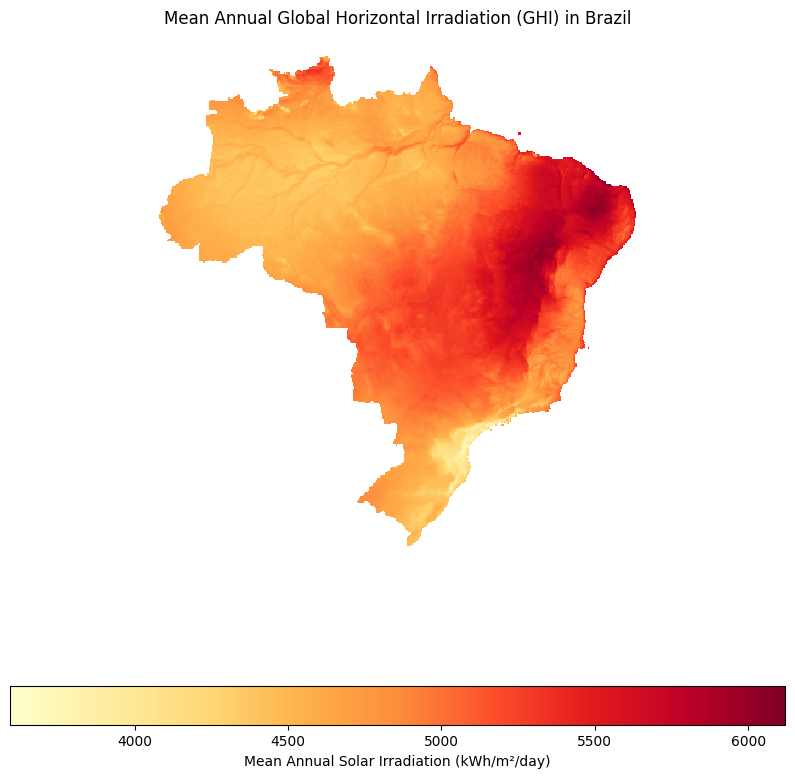

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
solar_gdf.plot(column='ANNUAL', ax=ax, legend=True,
             legend_kwds={'label': "Mean Annual Solar Irradiation (kWh/m²/day)", 'orientation': "horizontal"},
             cmap='YlOrRd')
ax.set_title("Mean Annual Global Horizontal Irradiation (GHI) in Brazil")
ax.set_axis_off()
plt.show()

## Identificação das Top 10 Áreas

In [8]:
top_10_areas = solar_gdf.sort_values(by='ANNUAL', ascending=False).head(10)
print("Top 10 areas with the highest mean annual solar irradiation:")
print(top_10_areas[['ID', 'ANNUAL', 'LON', 'LAT']])

Top 10 areas with the highest mean annual solar irradiation:
          ID  ANNUAL     LON      LAT
34862  34863    6120 -41.849  -9.8005
35229  35230    6094 -41.449  -9.7005
30902  30903    6091 -42.549 -11.0005
34863  34864    6090 -41.749  -9.8005
34494  34495    6089 -42.349  -9.9005
34857  34858    6073 -42.349  -9.8005
30307  30308    6072 -42.649 -11.2005
34861  34862    6072 -41.949  -9.8005
35228  35229    6068 -41.549  -9.7005
34864  34865    6062 -41.649  -9.8005


## Mapa com Zoom nas Top 10 Áreas

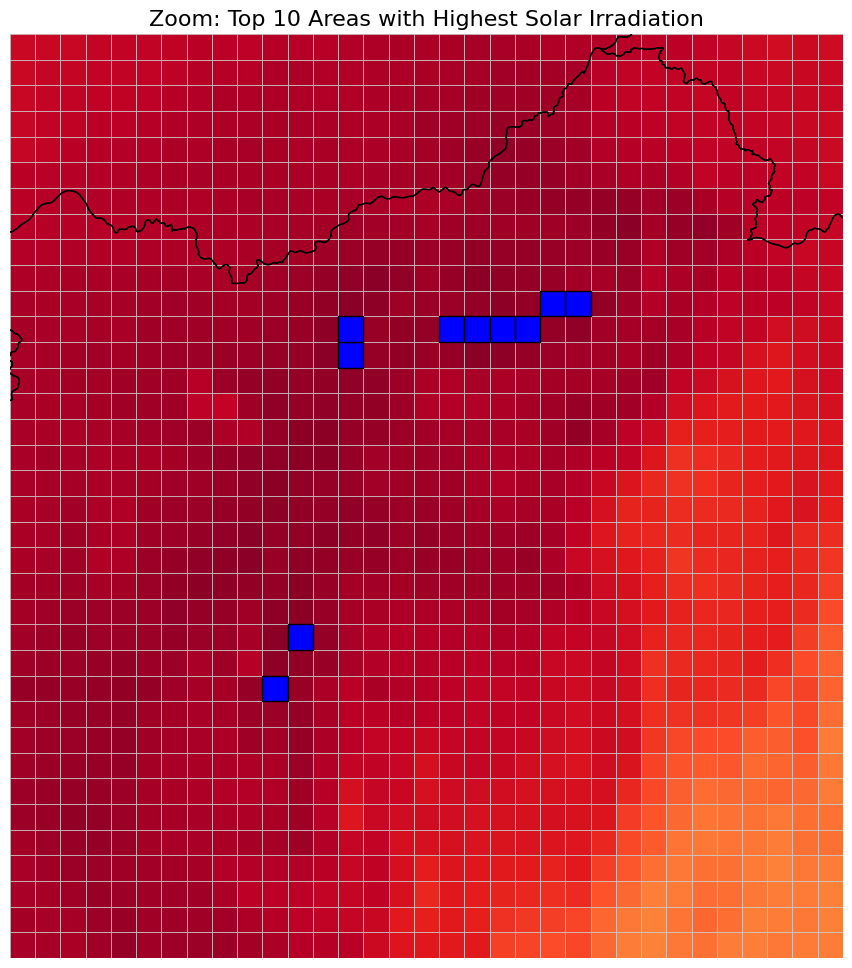

In [10]:
bounds = top_10_areas.total_bounds
padding = 1
min_lon, min_lat, max_lon, max_lat = (bounds[0] - padding, bounds[1] - padding, bounds[2] + padding, bounds[3] + padding)

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
solar_gdf.plot(column='ANNUAL', cmap='YlOrRd', linewidth=0.5, ax=ax, edgecolor='0.8')
states_gdf.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1)
top_10_areas.plot(ax=ax, marker='*', color='blue', markersize=200, edgecolor='black')

ax.set_xlim(min_lon, max_lon)
ax.set_ylim(min_lat, max_lat)
ax.set_axis_off()
ax.set_title("Zoom: Top 10 Areas with Highest Solar Irradiation", fontdict={'fontsize': '16', 'fontweight': '3'})
plt.show()